In [1]:
import os
import time
import sys
import scipy
import glob
import importlib
import _pickle as pkl
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl

from datetime import datetime

# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util
import behavior as butil

import shutil
import scipy.stats as spstats

import trajectory as traj
import plotting as putil

In [2]:
util.set_sns_style(style='dark', min_fontsize=12)
pl.rcParams['svg.fonttype'] = 'none'
%matplotlib notebook

plot_style = 'white'
util.set_sns_style(style=plot_style)
bg_color = 'k' if plot_style=='white' else 'w' 
boutdir_palette = {'inodor': bg_color, 'inbound': 'c', 'outbound': 'm'}
plot_st = '_yt' if plot_style == 'white' else ''
instrip_palette = {True: 'r', False: 'cornflowerblue'}

In [3]:
#srcdir = '/home/julianarhee/Documents/projects/plume-tracking/data'
# rootdir='/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data'
rootdir = util.get_rootdir()
print(rootdir)

srcdir = os.path.join(rootdir, 'jyr', 'plume_geometries', 'data')
fnames = os.listdir(srcdir)
fnames

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data


['0-curated.pkl',
 'from_andy',
 'info.pkl',
 'combined_df.pkl',
 'T_plume.pkl',
 '45-degree.pkl',
 'errors',
 '15-degree.pkl']

In [4]:
import _pickle as pkl

In [296]:
experiment = 'T-plume' #'0-curated' #'45-degree' #'0-curated' #'15-degree' #'T_plume'
create_new = False
combined_fpath = os.path.join(srcdir, '{}.pkl'.format(experiment))
if not os.path.exists(combined_fpath):
    create_new = True
else:
    print("loading: ", combined_fpath)
    with open(combined_fpath, 'rb') as f:
        df0_all = pkl.load(f)
if create_new:
    print("Creating combined data source")
    fpath = os.path.join(srcdir, 'from_andy', '{}.p'.format(experiment))
    print(fpath)
    with open(fpath, 'rb') as f:
        dfdict = pkl.load(f)
print(create_new)

loading:  /home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/plume_geometries/data/T-plume.pkl
False


## get combined DF

In [297]:
# #dfdict['03042022-140837_T_plume.log']['data']
# if create_new:
#     d_list = []
#     for fi, (fn, df_) in enumerate(dfdict.items()):
#         if 'instrip' not in df_['data'].columns:
#             print(fn)
#         df_['data']['filename'] = fn
#         df0 = df_['data'].copy()

#             # convert timestamp str into datetime obj, convert to sec
#         datefmt  = '%m/%d/%Y-%H:%M:%S.%f'
#         df0['time'] = df0['timestamp'].apply(lambda x: \
#                                 time.mktime(x.timetuple()) \
#                                 + x.microsecond / 1E6 ).astype('float')
#         df0['rel_time'] = df0['time'] - df0['time'].iloc[0]
#         # convert datestr
#         df0['date'] = df0['timestamp'].apply(lambda s: \
#                 int(s.date().strftime("%Y%m%d")))
#         # convert ft_heading to make it continuous and in range (-pi, pi)
#         if 'ft_heading' in df0.columns:
#             p = util.unwrap_and_constrain_angles(df0['ft_heading'].values)
#             df0['ft_heading'] = p #-p 

#         df0 = butil.process_df(df0, bout_thresh=0.25)
#         # df_z = putil.zero_trajectory(df0)
#         df0['fly_id'] = fi
#         df0['condition'] = experiment
#         df0['experiment'] = experiment
#         d_list.append(df0)
#     df0_all = pd.concat(d_list, axis=0)
#     with open(combined_fpath, 'wb') as f:
#         pkl.dump(df0_all, f)

# zero trajectories

In [298]:
d_list = []
for fn, df_ in df0_all.groupby('filename'):
    df_z = putil.zero_trajectory(df_)
    d_list.append(df_z)
df_zero = pd.concat(d_list, axis=0).reset_index(drop=True)

In [299]:
figid = combined_fpath
#figdir = srcdir.replace('data', 'figures') #os.path.join(figdir, experiment)
figdir = os.path.join(srcdir.replace('data', 'figures'), experiment)
if not os.path.exists(figdir):
    os.makedirs(figdir)
print("Save figures to: ", figdir)
if not os.path.exists(figdir):
    os.makedirs(figdir)

Save figures to:  /home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/plume_geometries/figures/T-plume


In [300]:
# if not df_zero['filename'].unique()[0].endswith('.log'):
#     file_lut = dict((fi, '{}.log'.format(fn)) for fi, fn in enumerate(df_zero['filename'].unique()))
# else:
file_lut = dict((fi, fn) for fi, fn in enumerate(df_zero['filename'].unique()))

print(len(file_lut))


13


In [301]:
# #putil.plot_array_of_trajectories(df, nr=3, nc=4, title='fly_id')
# nr=3 #2
# nc=9 #7
# fig, axn = pl.subplots(nr, nc, figsize=(nc*1.5,6), sharex=True, sharey=True)
# for fi, fn in file_lut.items(): #fi, (fn, df_) in enumerate(df.groupby('filename')):
#     df_ = df_zero[df_zero['filename']==fn].copy()
#     ax=axn.flat[fi]
#     butil.plot_trajectory(df_, ax =ax, palette=instrip_palette)
#     ax.set_aspect(0.25)
#     ax.legend_.remove()
#     title='{}. {}'.format(fi, fn.split('_')[0])
#     ax.set_title(title, fontsize=6)
# for i in np.arange(fi+1, nr*nc):
#     ax=axn.flat[i]
#     ax.axis('off')
# pl.tight_layout()
# # label and save
# util.label_figure(fig, figid)
# pl.savefig(os.path.join(figdir, 'trajectories_{}.png'.format(experiment)))

# get ETs

In [302]:
importlib.reload(butil)

<module 'behavior' from '/home/julianarhee/Repositories/plume-tracking/behavior.py'>

In [578]:
strip_width=50
strip_sep=1000
#max_instrip_upwind_dist = 500 #250 #250
#min_sum_instrip_upwind_dist = 250
#min_global_upwind_dist = 300
if experiment=='45-degree':
    # TODO: make this less janky -- crossovers bec downwind 
    max_crossovers = 4
    max_instrip_upwind_percent=0.5
    min_outside_bouts=5
    max_crossover_to_dist_ratio=4/500
    min_global_upwind_dist=400
elif experiment=='0-curated':
    max_crossovers = 0
    max_instrip_upwind_percent=0.5
    min_outside_bouts=5
    max_crossover_to_dist_ratio=1/500
    min_global_upwind_dist=400
else:
    max_crossovers = 4
    max_instrip_upwind_percent=0.5
    min_outside_bouts=5
    max_crossover_to_dist_ratio=4/500
    min_global_upwind_dist=400


if experiment=='T-plume':
    et_ixs = [3, 4, 9, 11]
    ets = [file_lut[i] for i in et_ixs]
    aggr_figname = 'traj_manually-selected'
else:
    ets=[]
    for fn, df_ in df0_all.groupby('filename'):
        odor_bounds = butil.find_strip_borders(df_, strip_angle=45,
                                                entry_ix=df_[df_['instrip']].iloc[0].name,
                                                strip_width=strip_width, strip_sep=strip_sep)
        et_bouts, et_boutstats, et_passkey = traj.find_et_bouts(df_,
                                            odor_bounds, strip_width=strip_width, strip_sep=strip_sep, 
                                            max_instrip_upwind_percent=max_instrip_upwind_percent, 
                                            max_crossovers=max_crossovers, 
                                            max_crossover_to_dist_ratio=max_crossover_to_dist_ratio,
                                            min_outside_bouts=min_outside_bouts,
                                            min_global_upwind_dist=min_global_upwind_dist)
        if len(et_bouts)>0:
            ets.append(fn) #'{}.log'.format(fn))
# aggr_figname = 'traj_max-crossovers-{}_min-outside-bouts-{}_max-instrip-upwind-perc-{}_n{}'\
#                 .format(max_crossovers, min_outside_bouts, str(max_instrip_upwind_percent).replace('.', ''), len(ets))
    aggr_figname = 'traj_max-crossovers-{}_min-outside-bouts-{}_crossoverdist_ratio-{}_min-global-upwind-{}_n{}'\
                .format(max_crossovers, min_outside_bouts, '1per500mm', min_global_upwind_dist, len(ets))
print(aggr_figname)

traj_manually-selected


In [579]:
df_zero['filename'].nunique()

13

<IPython.core.display.Javascript object>


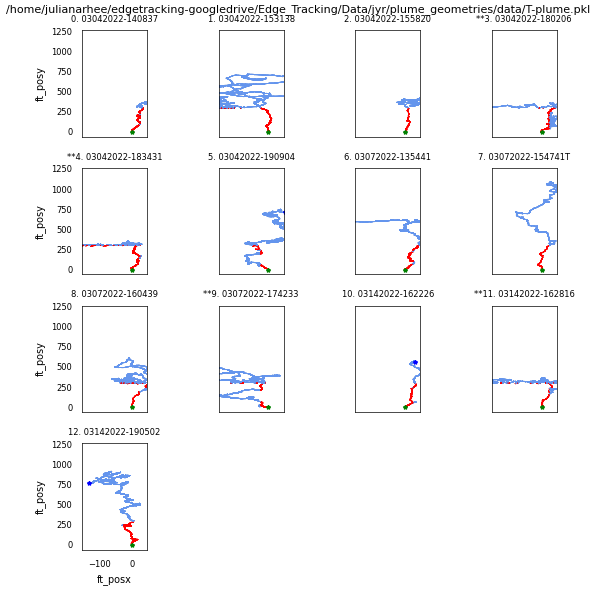

In [580]:
#putil.plot_array_of_trajectories(df, nr=3, nc=4, title='fly_id')
nr=4 #2
nc=4 #9 #7
fig, axn = pl.subplots(nr, nc, figsize=(nc*1.5,6), sharex=True, sharey=True)
for fi, fn in file_lut.items(): #fi, (fn, df_) in enumerate(df.groupby('filename')):
    df_ = df_zero[df_zero['filename']==fn].copy()
    ax=axn.flat[fi]
    butil.plot_trajectory(df_, ax =ax, palette=instrip_palette)
    ax.set_aspect(0.25)
    ax.legend_.remove()
    if fn in ets:
        title='**{}. {}'.format(fi, fn.split('_')[0])
    else:
        title='{}. {}'.format(fi, fn.split('_')[0])
    ax.set_title(title, fontsize=6)
for i in np.arange(fi+1, nr*nc):
    ax=axn.flat[i]
    ax.axis('off')
pl.tight_layout()
# label and save
util.label_figure(fig, figid)
pl.savefig(os.path.join(figdir, 'trajectories_{}.png'.format(experiment)))

In [581]:
# CHECK
# fn = [f for f in file_lut.values() if f.startswith('08252020-0123')][0]
# df_ = df0_all[df0_all['filename']==fn].copy()

# odor_bounds = butil.find_strip_borders(df_, strip_angle=45,
#                                         entry_ix=df_[df_['instrip']].iloc[0].name,
#                                         strip_width=strip_width, strip_sep=strip_sep)
# et_bouts, et_boutstats, et_passkey = traj.find_et_bouts(df_,
#                                     odor_bounds, strip_width=strip_width, strip_sep=strip_sep, 
#                                     max_instrip_upwind_percent=max_instrip_upwind_percent, 
#                                     max_crossovers=max_crossovers, 
#                                     max_crossover_to_dist_ratio=max_crossover_to_dist_ratio,
#                                     min_outside_bouts=min_outside_bouts,
#                                         min_global_upwind_dist=min_global_upwind_dist)

In [583]:
print(len(ets))
etdf_zero = df_zero[df_zero['filename'].isin(ets)].copy()
print("{} of {} trajectories are ET.".format(etdf_zero['filename'].nunique(), df_zero['filename'].nunique()))

4
4 of 13 trajectories are ET.


In [584]:
instrip_palette={True: 'r', False: 'cornflowerblue'}

<IPython.core.display.Javascript object>


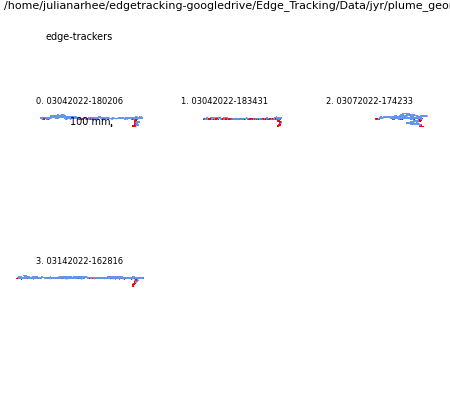

In [585]:
#putil.plot_array_of_trajectories(df, nr=3, nc=4, title='fly_id')
nr=2 #2
nc=3 #8 #6
fig, axn = pl.subplots(nr, nc, figsize=(nc*1.5,nr*2), sharex=True, sharey=True)
for fi, (fn, df_) in enumerate(etdf_zero.groupby('filename')):
    ax=axn.flat[fi]
    last_outbout = df_[df_['instrip']]['boutnum'].max()

    butil.plot_trajectory(df_[df_['boutnum']<=last_outbout], ax =ax, palette=instrip_palette, plot_start=False)
    ax.set_aspect(0.25)
    ax.legend_.remove()
    title='{}. {}'.format(fi, fn.split('_')[0])
    ax.set_title(title, fontsize=6)
    ax.axis('off')
    if fi==0:
        leg_xpos = -200; leg_ypos=0; leg_scale=100;
        putil.vertical_scalebar(ax, leg_xpos=leg_xpos, leg_ypos=leg_ypos, fontsize=7, color=bg_color)

for i in np.arange(fi+1, nr*nc):
    ax=axn.flat[i]
    ax.axis('off')
pl.tight_layout()
fig.text(0.1, 0.9, 'edge-trackers', fontsize=7)
util.label_figure(fig, figid)

pl.savefig(os.path.join(figdir, 'trajectories-ETs_{}{}.png'.format(experiment, plot_st)))

# filter first/last bout

In [586]:
boutdir_palette = {'inodor': bg_color, 'inbound': 'c', 'outbound': 'm'}
smooth_window=11
rdp_epsilon=1

In [587]:
importlib.reload(traj)

<module 'trajectory' from '/home/julianarhee/Repositories/plume-tracking/trajectory.py'>

In [597]:
xvar='ft_posx'
yvar='ft_posy'

if experiment=='T-plume':
    y_thresh = 300 - strip_width/2 
elif experiment in ['0-curated', '0-degree']:
    y_thresh = 0
else:
    y_thresh = etdf_zero['ft_posy'].min()
print(y_thresh)
etdf_filt = traj.filter_first_instrip_last_outstrip(etdf_zero, y_thresh=y_thresh)

275.0


# split inbound/outbound

In [599]:

etdf_filt = traj.split_inbound_outbound(etdf_filt, xvar=xvar, yvar=yvar)
etdf_filt = traj.rdp_trajectories(etdf_filt, rdp_epsilon=rdp_epsilon)


In [600]:
etdf_filt.columns

Index(['mfc1_stpt', 'mfc2_stpt', 'mfc3_stpt', 'led1_stpt', 'led2_stpt',
       'sig_status', 'ft_posx', 'ft_posy', 'ft_frame', 'ft_error', 'ft_roll',
       'ft_pitch', 'ft_yaw', 'ft_heading', 'instrip', 'timestamp',
       'motor_step_command', 'seconds', 'filename', 'time', 'rel_time', 'date',
       'boutnum', 'cum_time', 'speed', 'upwind_speed', 'crosswind_speed',
       'euclid_dist', 'upwind_dist', 'crosswind_dist', 'fly_id', 'condition',
       'experiment', 'flipped', 'odor_heading', 'boutdir', 'rdp_ft_posx',
       'rdp_ft_posy'],
      dtype='object')

In [601]:
if experiment=='T-plume':
    odor_angle = np.deg2rad(90)
else:
    deg = int(experiment.split('-')[0])
    print(deg)
    odor_angle = np.deg2rad(deg)
# add to df
etdf_filt['odor_heading'] = etdf_filt['ft_heading'] + odor_angle #np.pi/2
p = util.unwrap_and_constrain_angles(etdf_filt['odor_heading'].values)
etdf_filt['odor_heading'] = p #-p 

#### plot example

In [602]:
print(figdir)

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/plume_geometries/figures/T-plume


/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/plume_geometries/figures/T-plume/by-individual
03042022-180206_T_plume_Fly3.log


<IPython.core.display.Javascript object>


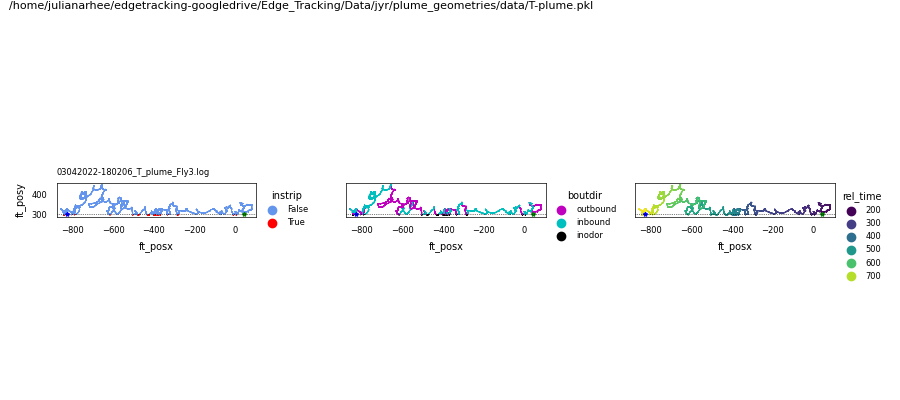

03042022-183431_T_Plume_Fly4.log


<IPython.core.display.Javascript object>


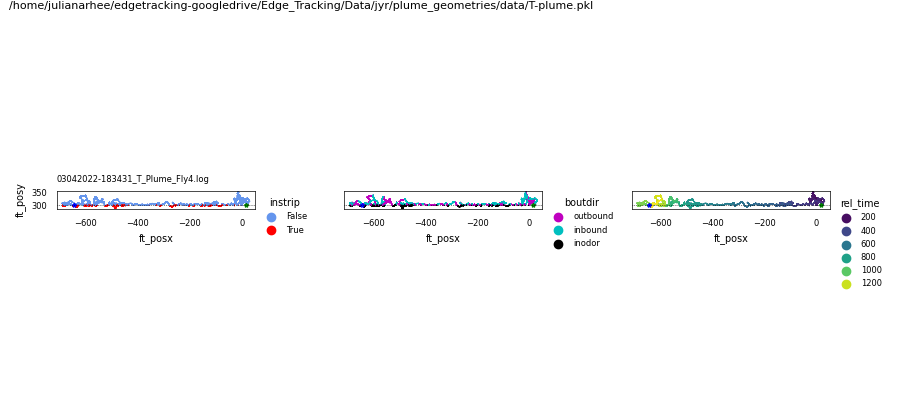

03072022-174233_T_Plume_Fly8.log


<IPython.core.display.Javascript object>


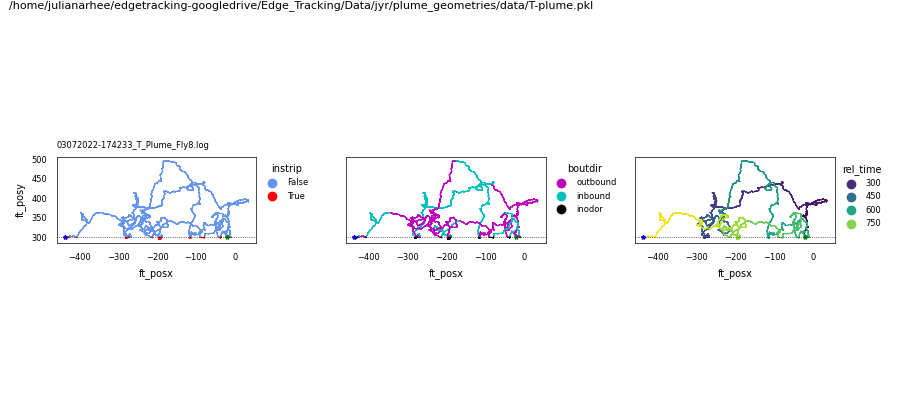

03142022-162816_T_plume_Fly9_T2.log


<IPython.core.display.Javascript object>


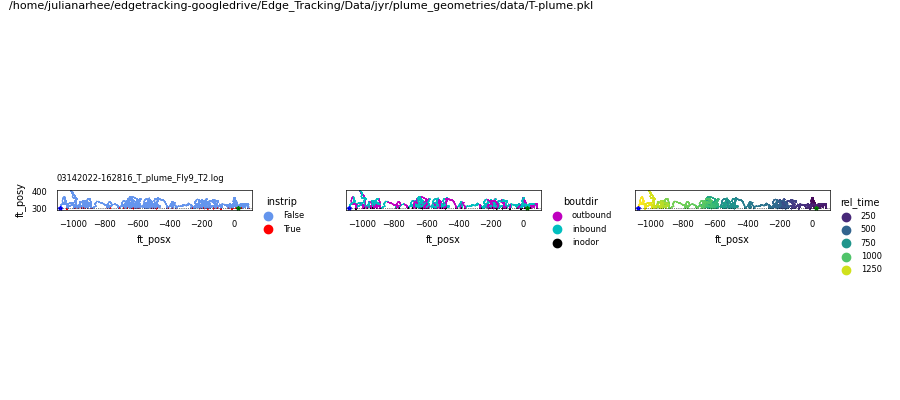

In [603]:

curr_figdir = os.path.join(figdir, 'by-individual')
if not os.path.exists(curr_figdir):
    os.makedirs(curr_figdir)
print(curr_figdir)

for fn, df_ in etdf_filt.groupby('filename'):
    print(fn)
    fig, axn = pl.subplots(1, 3, figsize=(9,4), sharex=True, sharey=True)
    butil.plot_trajectory(df_, ax=axn[0], palette=instrip_palette)
    butil.plot_trajectory(df_, hue_varname='boutdir', palette=boutdir_palette, ax=axn[1])
    butil.plot_trajectory(df_, hue_varname='rel_time', palette='viridis', ax=axn[2])
    pl.subplots_adjust(wspace=0.75)
    for ax in axn:
        ax.set_aspect(1)
        if experiment=='T-plume':
            ax.axhline(y=300, linestyle=':', lw=0.5, color=bg_color)
    pl.tight_layout()
    axn[0].set_title(fn, loc='left', fontsize=6)

    util.label_figure(fig, figid)
    pl.savefig(os.path.join(curr_figdir, 'trajectory-hue_{}.png'.format(fn)))


# heading angles

#### plot heading distn for each

<IPython.core.display.Javascript object>


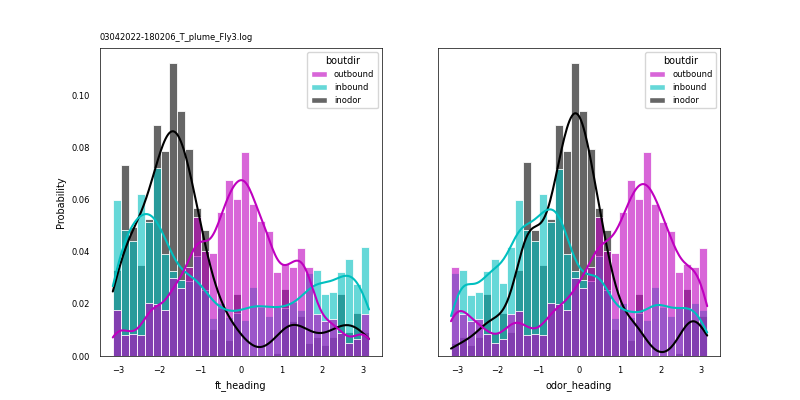

TypeError: join() missing 1 required positional argument: 'a'

In [605]:
for fn, d_ in etdf_filt.groupby('filename'):
    fig, axn = pl.subplots(1, 2, figsize=(8,4), sharex=True, sharey=True)
    sns.histplot(data=d_, x='ft_heading', hue='boutdir', palette=boutdir_palette, ax=axn[0], alpha=0.6, 
                 element='bars', kde=True, common_norm=False, stat='probability') 
    sns.histplot(data=d_, x='odor_heading', hue='boutdir', palette=boutdir_palette, ax=axn[1], alpha=0.6, 
                 element='bars', kde=True, common_norm=False, stat='probability') 
    axn[0].set_title(fn, loc='left', fontsize=6)
    pl.savefig(os.path.join())

In [504]:
boutdir_palette = {'inodor': 'k', 'outbound': 'm', 'inbound': 'c'}

In [606]:
if experiment=='T-plume':
    y_thresh = 300 - strip_width/2 
elif experiment in ['0-curated', '0-degree']:
    y_thresh = 0
else:
    y_thresh = etdf_zero['ft_posy'].min()
print(y_thresh)
b_list = []
for fn, d_ in etdf_filt.groupby('filename'):
    avg1_ = d_.groupby(['boutnum', 'instrip', 'boutdir'], as_index=False)\
                    .apply(util.get_weighted_average, hist_var='ft_heading', 
                    weights_var=weights_var, is_circular=True).rename(columns={None: 'ft_heading'})
    avg2_ = d_.groupby(['boutnum', 'instrip', 'boutdir'], as_index=False)\
                    .apply(util.get_weighted_average, hist_var='odor_heading', 
                    weights_var=weights_var, is_circular=True).rename(columns={None: 'odor_heading'})
    avg_ = pd.merge(avg1_, avg2_, on=['boutnum', 'instrip', 'boutdir'])
    dist_ = d_.groupby(['boutnum', 'instrip', 'boutdir'], as_index=False).apply(util.get_euclid_distance).rename(columns={None: weights_var})

    boutdf = pd.merge(avg_, dist_, on=['boutnum', 'instrip', 'boutdir'])
    boutdf['filename'] = fn
    b_list.append(boutdf)
boutdf = pd.concat(b_list).reset_index(drop=True)

275.0


/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/plume_geometries/figures/T-plume/by-individual


<IPython.core.display.Javascript object>


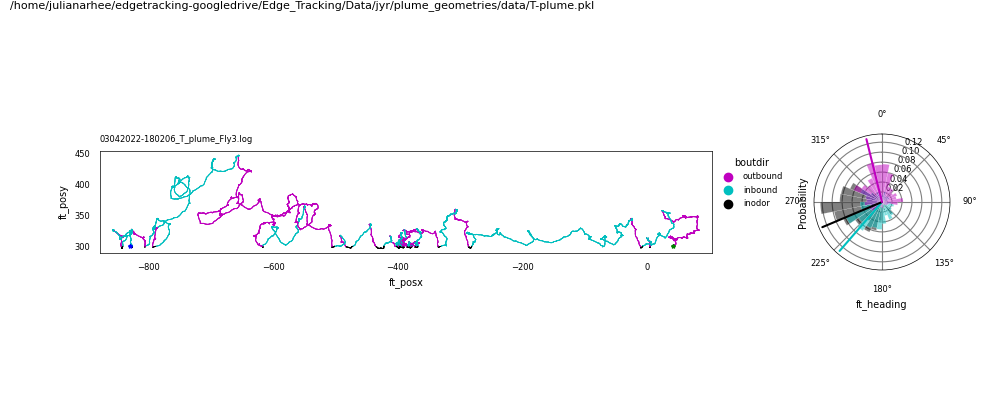

<IPython.core.display.Javascript object>


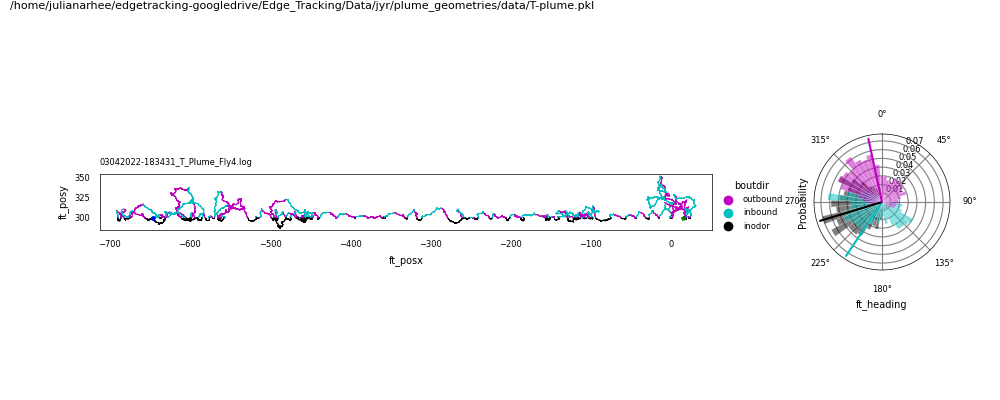

<IPython.core.display.Javascript object>


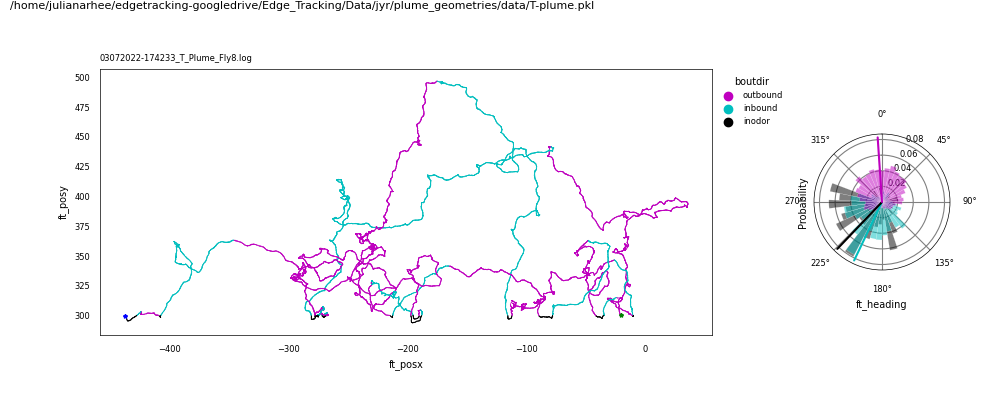

<IPython.core.display.Javascript object>


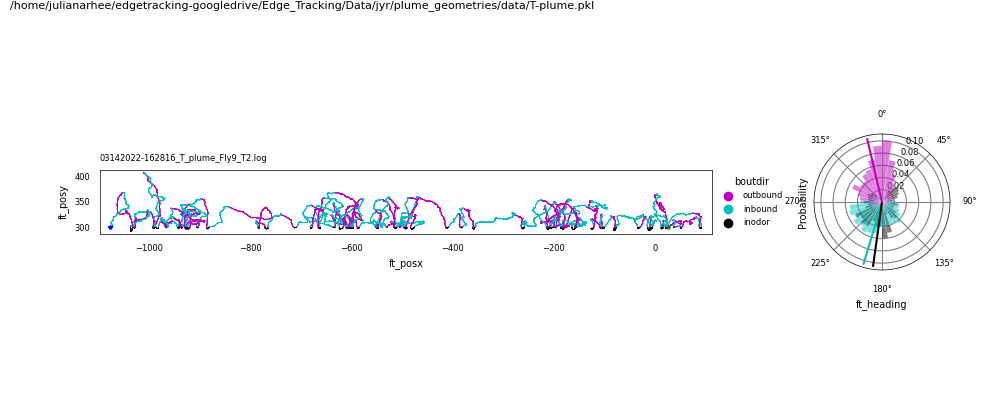

In [607]:
hist_var = 'ft_heading'
weights_var = 'euclid_dist'
bin_method='fd'

curr_figdir = os.path.join(figdir, 'by-individual')
if not os.path.exists(curr_figdir):
    os.makedirs(curr_figdir)
print(curr_figdir)

if experiment=='T-plume':
    y_thresh = 300 - strip_width/2 
elif experiment in ['0-curated', '0-degree']:
    y_thresh = 0
else:
    y_thresh = etdf_filt['ft_posy'].min()
for fn, d_ in etdf_filt.groupby('filename'):
    fig = pl.figure(figsize=(10,4))
    gs = mpl.gridspec.GridSpec(1,4)
    ax = fig.add_subplot(gs[0, 0:3])
    # remove last bout
    #first_bout = df_[df_['ft_posy']>=y_thresh].iloc[0]['boutnum'] + 1
    #last_bout = df_[df_['instrip']]['boutnum'].max()
    #d_ = df_[(df_['boutnum']>=first_bout) & (df_['boutnum']<=last_bout)].copy()
    # plot trajectory
    butil.plot_trajectory(d_, hue_varname='boutdir', palette=boutdir_palette, ax=ax)
    ax.set_title(fn, loc='left', fontsize=6)
    ax.set_aspect(1)
    # ax.legend(bbox_to_anchor=(1,1), loc='lower right')
    ax = fig.add_subplot(gs[0, 3], projection='polar') #pl.subplot(122, projection='polar')
    ax = sns.histplot(data=d_, bins=bin_method, x=hist_var, ax=ax, hue='boutdir', 
                     palette=boutdir_palette, alpha=0.5, common_norm=False, 
                     stat='probability', weights=weights_var, linewidth=0.1)
    # plot average:  use weighted average combine all bouts
    ylim = ax.get_ylim()[-1]
    for boutdir, bdf in d_.groupby('boutdir'):
        weighted_avg = util.get_weighted_average(bdf,
                                hist_var=hist_var, weights_var=weights_var, is_circular=True) 
        ax.plot([0, weighted_avg], [0, ylim], boutdir_palette[boutdir]) 
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.legend_.remove() 
    # save
    pl.subplots_adjust(left=0.1, right=0.95, wspace=0.75)
    util.label_figure(fig, figid)
    pl.savefig(os.path.join(curr_figdir, '{}.png'.format(fn)))


4
275.0


<IPython.core.display.Javascript object>


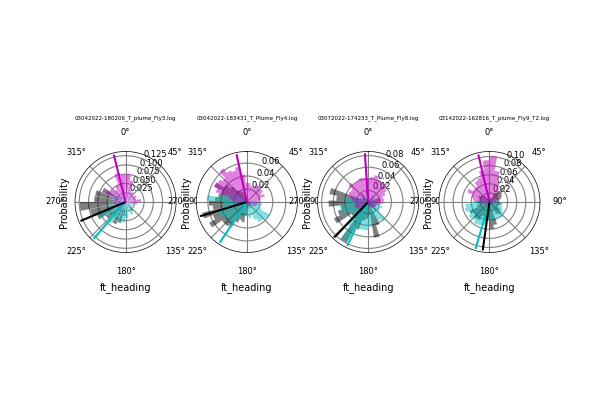

In [608]:
n_files = etdf_filt['filename'].nunique()
print(n_files)

hist_var='ft_heading'
weights_var = 'euclid_dist'
nr=1
nc=4
print(y_thresh)
n_files = etdf_zero['filename'].nunique()
fig, axn  = pl.subplots(nr, nc, subplot_kw=dict(polar=True))
for fi, (fn, d_) in enumerate(etdf_filt.groupby('filename')):
    ax = axn.flat[fi]
    sns.histplot(data=d_, bins=bin_method, x=hist_var, ax=ax, hue='boutdir', 
                 palette=boutdir_palette, alpha=0.5, common_norm=False, weights=weights_var,
                stat='probability', lw=0.1)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.legend_.remove() #sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1,1))
    # plot average
    ylim = ax.get_ylim()[-1]
    for boutdir, bdf in d_.groupby('boutdir'):
        weighted_avg = util.get_weighted_average(bdf, hist_var=hist_var, weights_var=weights_var)
        ax.plot([0, weighted_avg], [0, ylim], boutdir_palette[boutdir]) # theta is x
    ax.set_title(fn, loc='left', fontsize=4)

# average heading

<IPython.core.display.Javascript object>


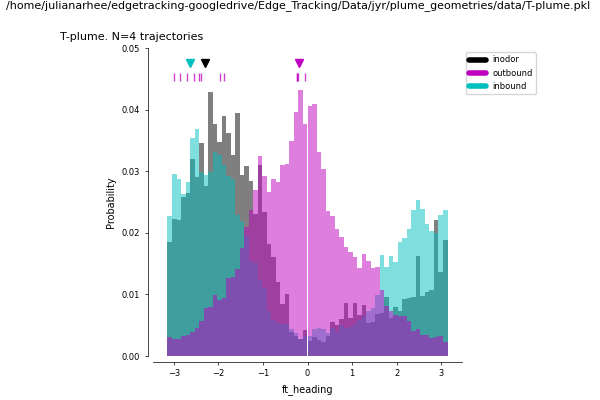

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/plume_geometries/figures/T-plume/ft_heading_avg-fly_polar_T-plume_yt.svg


In [777]:
hist_var='ft_heading'
plot_polar=False
weights_var = 'euclid_dist'
avg_marker = 'v'
fly_marker = '|'
alpha=0.75

fig, ax  = pl.subplots(subplot_kw=dict(polar=plot_polar))
# histogram of ALL bouts across all flies
sns.histplot(data=etdf_filt, x=hist_var, hue='boutdir', bins=bin_method, ax=ax, palette=boutdir_palette, 
             edgecolor='none', stat='probability', common_norm=False, weights='euclid_dist', lw=0.1)
# each fly's average
ylim = ax.get_ylim()[-1]
b_list = []
for fn, d_ in etdf_filt.groupby('filename'):
    for bdir, b_ in d_.groupby('boutdir'):
        # get average
        heading_ = util.get_weighted_average(b_, hist_var=hist_var, weights_var=weights_var) #util.circular_mean(fl_[hist_var])
        # plot animal's average
        if plot_polar:
            ax.plot([0, heading_], [0, ylim], color=boutdir_palette[bdir], label=bdir, lw=0.5) # theta is x
        else:
            ax.plot([heading_], [ylim], marker=fly_marker, alpha=alpha, color=boutdir_palette[boutdir])
# plot average across flies
ylim = ax.get_ylim()[-1]
fly_avgs = etdf_filt.groupby(['filename', 'boutdir'], as_index=False)\
            .apply(util.get_weighted_average, hist_var=hist_var, weights_var=weights_var).rename(columns={None: hist_var})
for boutdir, bdf in fly_avgs.groupby('boutdir'):
    fly_avg = util.circular_mean(bdf[hist_var])
    if plot_polar:
        ax.plot([0, fly_avg], [0, ylim], color=boutdir_palette[boutdir], lw=4) # theta is x
    else:
        ax.plot([fly_avg], [ylim], marker=avg_marker, color=boutdir_palette[boutdir], lw=4) # theta is x

if plot_polar:
    # orient axes
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
else:
    # ticks
    ax.set_box_aspect(1)
    ax.tick_params(which='both', axis='both', length=2, width=0.5, color='k',
                   direction='out', left=True, bottom=True)
    sns.despine(offset=4)
# legend
# sns.move_legend(ax, bbox_to_anchor=(1,1), loc='upper left')
labels=['inodor', 'outbound', 'inbound']
colors=[boutdir_palette[v] for v in labels]
legh = putil.custom_legend(labels=labels, colors=colors) #, instrip_palette[False]])
ax.legend(handles=legh, bbox_to_anchor=(1,1), loc='upper left')
# label
n_filenames = boutdf['filename'].nunique()
fig.text(0.1, 0.9, '{}. N={} trajectories'.format(experiment, n_filenames), fontsize=8)
util.label_figure(fig, figid)
# save
figname = '{}_avg-fly_polar'.format(hist_var)
pl.savefig(os.path.join(figdir, '{}_{}{}.svg'.format(figname, experiment, plot_st)))
pl.savefig(os.path.join(figdir, '{}_{}{}.png'.format(figname, experiment, plot_st)))
print(os.path.join(figdir, '{}_{}{}.svg'.format(figname, experiment, plot_st)))

# RDP and angles of entry/exit

In [780]:
etdf_filt = etdf_filt.groupby(['filename', 'boutnum'], as_index=False).apply(butil.rdp_to_heading)
etdf_filt = traj.get_entry_exit_angles_rdp(etdf_filt)

/tmp/ipykernel_1496107/2686152473.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  etdf_filt = etdf_filt.groupby(['filename', 'boutnum'], as_index=False).apply(butil.rdp_to_heading)


# save et df

In [782]:
etdir = os.path.join(srcdir, 'ets')
if not os.path.exists(etdir):
    os.makedirs(etdir)
    
et_fpath = os.path.join(etdir, 'et_{}.pkl'.format(experiment))
with open(et_fpath, 'wb') as f:
    pkl.dump({'etdf_zero': etdf_zero,
              'etdf_filt': etdf_filt,
              'boutdf': boutdf,
              'entries_exits': entries_exits}, f)
print(et_fpath)

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/plume_geometries/data/ets/et_T-plume.pkl


# plot entry/exit

In [756]:
boutdir_palette

{'inodor': 'k', 'inbound': 'c', 'outbound': 'm'}

In [767]:
rdp_boutdir_palette = {'inside': 'gray', 'exit': 'r', 'entry': 'cornflowerblue'}

<IPython.core.display.Javascript object>


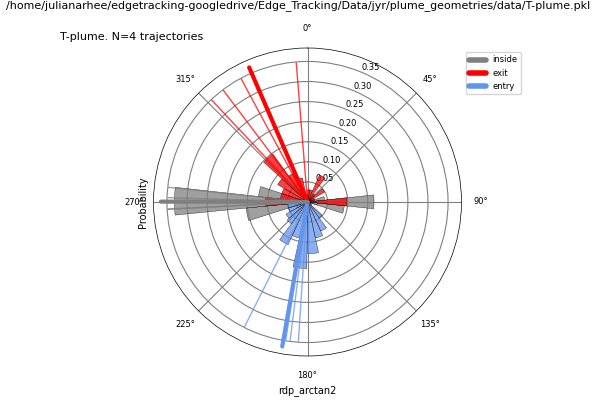

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/plume_geometries/figures/T-plume/rdp_arctan2_avg-fly_polar_T-plume_yt.svg


In [784]:
hist_var = 'rdp_arctan2'
weights_var='euclid_dist'
plot_polar = True

plot_type = 'polar' if plot_polar else 'lin'
fly_lw = 1
avg_lw = 3
avg_marker = 'v'
fly_marker = '|'
alpha=0.75

fig, ax  = pl.subplots(subplot_kw=dict(polar=plot_polar))
# histogram of ALL bouts across all flies
sns.histplot(data=entries_exits, x=hist_var, hue='rdp_boutdir', ax=ax, palette=rdp_boutdir_palette, 
             edgecolor='k', lw=0.25, alpha=alpha, stat='probability', common_norm=False, bins=30)
# plot each fly's average
ylim = ax.get_ylim()[-1]
b_list = []
for fn, df_ in etdf_zero.groupby('filename'):
    last_bout = df_[df_['instrip']]['boutnum'].max()
    d_ = df_[(df_['ft_posy']>=y_thresh) & (df_['boutnum']<=last_bout)].copy()
    # get first/last
    ees = entries_exits[entries_exits['filename']==fn].copy() #d_[d_['rdp_ft_posx']].groupby('boutnum').agg(['first', 'last']).stack().reset_index().rename(columns={'level_1': 'order'})
    # get average
    for rdp_bdir, b_ in ees.groupby('rdp_boutdir'):
        avg_dir = util.get_weighted_average(b_, hist_var=hist_var, weights_var=weights_var)
    #exits_ = firstlast_[ (firstlast_['instrip']) & (firstlast_['order']=='last')]
    #entries_ = firstlast_[ (~firstlast_['instrip']) & (firstlast_['order']=='last')]
    #avg_exit = util.get_weighted_average(exits_, hist_var=hist_var, weights_var=weights_var)
    #avg_entry = util.get_weighted_average(entries_, hist_var=hist_var, weights_var=weights_var)
    # plot animal's average
        if plot_polar:
            ax.plot([0, avg_dir], [0, ylim], alpha=alpha, color=rdp_boutdir_palette[rdp_bdir], lw=fly_lw, label=rdp_bdir) # theta is x
            #ax.plot([0, avg_entry], [0, ylim], alpha=alpha, color=instrip_palette[False], lw=fly_lw, label='entry') # theta is x
        else:
            ax.plot([avg_dir], [ylim], marker=fly_marker, alpha=alpha, color=rdp_boutdir_palette[rdp_bdir], label=rdp_bdir) # theta is x
            #ax.plot([avg_entry], [ylim], marker=fly_marker, alpha=alpha, color=instrip_palette[False], label='entry') # theta is x

# plot average across flies
ylim = ax.get_ylim()[-1]
for rdp_bdir, b_ in entries_exits.groupby('rdp_boutdir'):
    fly_avg = util.get_weighted_average(b_, hist_var=hist_var, weights_var=weights_var)
    util.circular_mean(b_.groupby('filename', as_index=False).apply(util.get_weighted_average, 
                            hist_var=hist_var, weights_var=weights_var).rename(columns={None: hist_var})[hist_var])

# fly_avgs_exits = util.circular_mean(entries_exits[ (entries_exits['instrip']) ].groupby('filename', as_index=False).apply(util.get_weighted_average, 
#                             hist_var=hist_var, weights_var=weights_var).rename(columns={None: hist_var})[hist_var])
# fly_avgs_entries = util.circular_mean(entries_exits[ (~entries_exits['instrip']) ].groupby('filename', as_index=False).apply(util.get_weighted_average, 
#                             hist_var=hist_var, weights_var=weights_var).rename(columns={None: hist_var})[hist_var])
    if plot_polar:
        ax.plot([0, fly_avg], [0, ylim], color=rdp_boutdir_palette[rdp_bdir], lw=avg_lw, label=rdp_bdir) # theta is x
        #ax.plot([0, fly_avgs_entries], [0, ylim], color=instrip_palette[False], lw=avg_lw, label='entry') # theta is x
    else:
        ax.plot([fly_avg], [ylim], marker=avg_marker, color=rdp_boutdir_palette[rdp_bdir], label=rdp_bdir) # theta is x
        #ax.plot([fly_avgs_entries], [ylim], marker=avg_marker, color=instrip_palette[False], lw=4) # theta is x

if plot_polar:
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
else:
    ax.set_box_aspect(1)
    ax.tick_params(which='both', axis='both', length=2, width=0.5, color='k',
               direction='out', left=True, bottom=True)
    # ticks
    sns.despine(offset=4)

# legend
labels= ['inside', 'exit', 'entry']
colors = [rdp_boutdir_palette[l] for l in labels]
legh = putil.custom_legend(labels=labels, colors=colors)
ax.legend(handles=legh, bbox_to_anchor=(1,1), loc='upper left')
# label
n_filenames = firstlast['filename'].nunique()
fig.text(0.1, 0.9, '{}. N={} trajectories'.format(experiment, n_filenames), fontsize=8)
util.label_figure(fig, figid)
# save
figname = '{}_avg-fly_{}'.format(hist_var, plot_type)
pl.savefig(os.path.join(figdir, '{}_{}{}.svg'.format(figname, experiment, plot_st)))
pl.savefig(os.path.join(figdir, '{}_{}{}.png'.format(figname, experiment, plot_st)))
print(os.path.join(figdir, '{}_{}{}.svg'.format(figname, experiment, plot_st)))

# heatmaps

In [1187]:
import scipy as sp

In [1188]:
df = df0_all.copy()

max_nframes = df.groupby('filename')['ft_posy'].count().max()

d_list=[]
for fi, (fn, df_) in enumerate(df.groupby('filename')):
    #up_ = traj.upsample_bout_trajectories(df_, npoints=max_nframes)
    x = df_['ft_posx'].values
    y = df_['ft_posy'].values
    t = np.arange(len(df_))
    t_common = np.linspace(t[0], t[-1], max_nframes)
    fx = sp.interpolate.interp1d(t, x)
    fy = sp.interpolate.interp1d(t, y)

    interpx =fx(t_common)
    interpy = fy(t_common)
    d_ = pd.DataFrame({
        'ft_posx': interpx,
        'ft_posy': interpy,
        'filename': fn,
        'fly_id': fi
    })    
    d_list.append(d_)

updf = pd.concat(d_list, axis=0)
updf.groupby('filename').count()

,ft_posx,ft_posy,fly_id
filename,,,
08122020-192731_15degOdorRight,93832,93832,93832
08122020-194433_15degOdorLeft,93832,93832,93832
08122020-204827_15degOdorRight(animal stops frequently and for long periods),93832,93832,93832
08132020-014103_15degOdorRight,93832,93832,93832
"08132020-022753_15degOdorLeft(lossed tracking - suction may have been blocked, possible ACV buildup)",93832,93832,93832
08132020-025500_15degOdorLeftReinforced(lossed tracking),93832,93832,93832
08142020-204831_15degOdorRight(lossed tracking),93832,93832,93832
08142020-222909_15degOdorRight,93832,93832,93832
08152020-003127_15degOdorRight(lossed tracking),93832,93832,93832


<IPython.core.display.Javascript object>


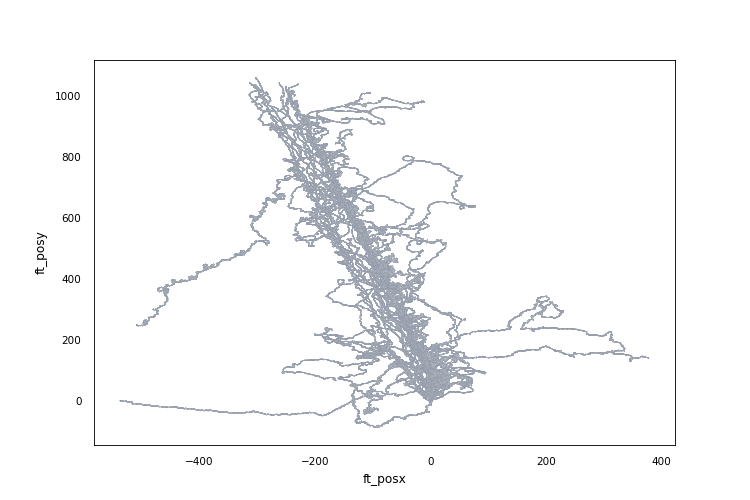

In [1189]:
fig, ax= pl.subplots()
for fn, df_ in df.groupby('filename'):
    sns.scatterplot(data=df_, x='ft_posx', y='ft_posy', s=0.3, color='w', ax=ax,
                   hue='fly_id', palette='bone', legend=0)

In [1192]:
importlib.reload(util)

<module 'utils' from '/home/julianarhee/Repositories/plume-tracking/utils.py'>

In [1193]:
# sns.set_style('white')
util.set_sns_style(style='white')
#util.set_sns_style(style='dark')


<IPython.core.display.Javascript object>


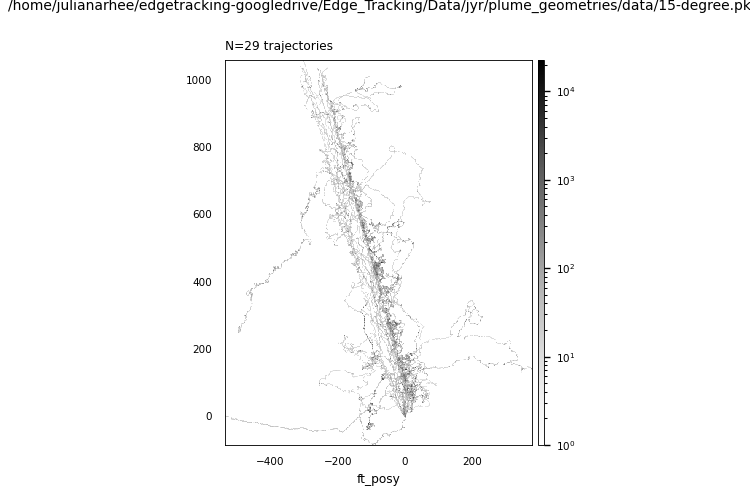

In [1194]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
cmap='Greys'

fig, ax = pl.subplots()
h, xe, ye, img = ax.hist2d(df['ft_posx'], df['ft_posy'], bins=500, norm=mpl.colors.LogNorm(), cmap=cmap)
ax.set_aspect(1)
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05, )
   
#fig.colorbar(img, ax=ax, fraction=0.046, pad=0.04)
n_files = df['filename'].nunique()
pl.colorbar(img, cax=cax)
ax.set_xlabel('ft_posx')
ax.set_xlabel('ft_posy')
ax.set_title('N={} trajectories'.format(n_files), loc='left')

util.label_figure(fig, figid)

figname = 'heatmap_{}'.format(experiment)
pl.savefig(os.path.join(figdir, '{}{}.png'.format(figname, plot_st)), dpi=300)
# pl.savefig(os.path.join(figdir, '{}.svg'.format(figname)))


In [1195]:
figdir

'/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/plume_geometries/figures/15-degree'

In [606]:
df.shape

(548349, 7)

In [607]:
d_list = []
for i, (xi, yi) in enumerate(zip(xe[0:-1], ye[0:-1])):
    startix, endix = xi, xe[i+1]
    curr_n_x = df[(df['ft_posx']>=startix) & (df['ft_posx']<endix)]['filename'].nunique()
    startix, endix = yi, ye[i+1]
    curr_n_y = df[(df['ft_posy']>=startix) & (df['ft_posy']<endix)]['filename'].nunique()
    
    d_ = pd.DataFrame({
        'edge': ['x', 'y'],
        'edge_value': [xi, yi],
        'n_flies': [curr_n_x, curr_n_y],
        'index': [i, i]
    }, index=[i, i])
    
    d_list.append(d_)
cnts = pd.concat(d_list).reset_index(drop=True)
    

In [610]:
cnts.max()

edge                    y
edge_value    1189.569773
n_flies                13
index                  99
dtype: object

<IPython.core.display.Javascript object>


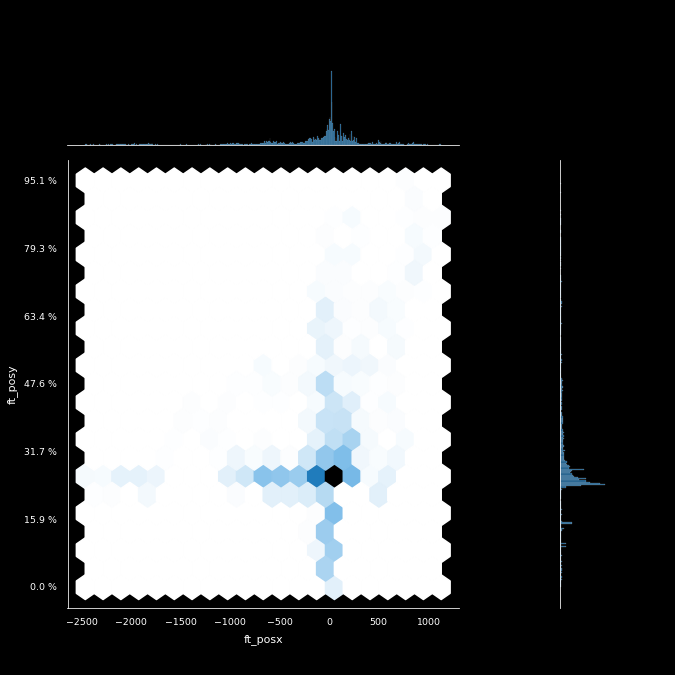

/tmp/ipykernel_930869/4234369947.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  kdeplot.fig.axes[-1].set_yticklabels([f'{t / cbar_max * 100:.1f} %' for t in cbar_ticks])


In [20]:
kdeplot = sns.jointplot(data=df, x="ft_posx", y="ft_posy", kind="hex",
              joint_kws=dict(gridsize=20))
             #marginal_kws=dict(bins=1000, fill=False))
# make new ax object for the cbar
# cbar_ax = hexplot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
# pl.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
# # make new ax object for the cbar
# cbar_ax = hexplot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
# pl.colorbar(cax=cbar_ax)

pl.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)
pos_joint_ax = kdeplot.ax_joint.get_position()
pos_marg_x_ax = kdeplot.ax_marg_x.get_position()
kdeplot.ax_joint.set_position([pos_joint_ax.x0, pos_joint_ax.y0, pos_marg_x_ax.width,
                               pos_joint_ax.height])
kdeplot.fig.axes[-1].set_position([.83, pos_joint_ax.y0, .07, pos_joint_ax.height])

# get the current colorbar ticks
cbar_ticks = kdeplot.fig.axes[-1].get_yticks()
# get the maximum value of the colorbar
_, cbar_max = kdeplot.fig.axes[-1].get_ylim()
# change the labels (not the ticks themselves) to a percentage
kdeplot.fig.axes[-1].set_yticklabels([f'{t / cbar_max * 100:.1f} %' for t in cbar_ticks])

pl.show()